In [186]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as px
px.init_notebook_mode(connected=True)
px.offline.init_notebook_mode(connected=True)
import plotly.express as px
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error 

logging.getLogger().setLevel('INFO')

In [188]:
#Read in the data
df_atp = pd.read_csv('capstone_data_cleaned.csv')
df_atp

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL
0,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Basilashvili N.,Arnaboldi A.,40.0,267.0,1395.0,206.0,4.0,6.0,7.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.67,2.56,1.56,2.42,1.50,2.50,1.61,2.44
1,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Celikbilek A.,Zuk K.,309.0,262.0,150.0,209.0,7.0,6.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.70,1.55,2.57,1.50,2.50,1.50,2.63,1.54
2,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Ruusuvuori E.,Vesely J.,87.0,67.0,806.0,928.0,6.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.63,3.03,1.52,2.53,1.50,2.50,1.56,2.58
3,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Bublik A.,Caruso S.,49.0,76.0,1090.0,858.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.87,2.30,1.72,2.11,1.61,2.20,1.81,2.09
4,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Goffin D.,Herbert P.H.,16.0,83.0,2555.0,822.0,3.0,6.0,7.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.50,3.00,1.44,2.78,1.40,2.75,1.46,2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22936,London,Masters Cup,2018-11-16,Masters Cup,Indoor,Hard,Round Robin,3,Zverev A.,Isner J.,5.0,10.0,5085.0,3155.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.44,3.40,1.38,3.14,1.36,3.20,1.40,3.22
22937,London,Masters Cup,2018-11-16,Masters Cup,Indoor,Hard,Round Robin,3,Djokovic N.,Cilic M.,1.0,7.0,8045.0,4050.0,7.0,6.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.22,6.03,1.17,5.14,1.20,4.50,1.20,5.23
22938,London,Masters Cup,2018-11-17,Masters Cup,Indoor,Hard,Semifinals,3,Zverev A.,Federer R.,5.0,3.0,5085.0,6020.0,7.0,5.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,3.40,1.45,3.14,1.38,3.20,1.36,3.24,1.41
22939,London,Masters Cup,2018-11-17,Masters Cup,Indoor,Hard,Semifinals,3,Djokovic N.,Anderson K.,1.0,6.0,8045.0,4310.0,6.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.15,7.72,1.12,6.52,1.11,7.00,1.12,7.72


In [189]:
#Dataframe shape
df_atp.shape

(22941, 35)

In [190]:
print(f'Our dataframe has {df_atp.shape[0]} rows and {df_atp.shape[1]} columns.')

Our dataframe has 22941 rows and 35 columns.


In [191]:
df_atp.columns

Index(['Location', 'Tournament', 'Date', 'Series', 'Court', 'Surface', 'Round',
       'Best of', 'Winner', 'Loser', 'WRank', 'LRank', 'WPts', 'LPts', 'W1',
       'L1', 'W2', 'L2', 'W3', 'L3', 'W4', 'L4', 'W5', 'L5', 'Wsets', 'Lsets',
       'Comment', 'MaxW', 'MaxL', 'AvgW', 'AvgL', 'B365W', 'B365L', 'PSW',
       'PSL'],
      dtype='object')

In [192]:
#Checking the data type for each column
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22941 entries, 0 to 22940
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    22941 non-null  object 
 1   Tournament  22941 non-null  object 
 2   Date        22941 non-null  object 
 3   Series      22941 non-null  object 
 4   Court       22941 non-null  object 
 5   Surface     22941 non-null  object 
 6   Round       22941 non-null  object 
 7   Best of     22941 non-null  int64  
 8   Winner      22941 non-null  object 
 9   Loser       22941 non-null  object 
 10  WRank       22941 non-null  float64
 11  LRank       22941 non-null  float64
 12  WPts        22941 non-null  float64
 13  LPts        22941 non-null  float64
 14  W1          22941 non-null  float64
 15  L1          22941 non-null  float64
 16  W2          22941 non-null  float64
 17  L2          22941 non-null  float64
 18  W3          22941 non-null  float64
 19  L3          22941 non-nul

In [193]:
# Date column being converted from object to datetime
df_atp['Date'] = pd.to_datetime(df_atp['Date']) 

In [194]:
#Checking Date column converted to datetime
df_atp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22941 entries, 0 to 22940
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Location    22941 non-null  object        
 1   Tournament  22941 non-null  object        
 2   Date        22941 non-null  datetime64[ns]
 3   Series      22941 non-null  object        
 4   Court       22941 non-null  object        
 5   Surface     22941 non-null  object        
 6   Round       22941 non-null  object        
 7   Best of     22941 non-null  int64         
 8   Winner      22941 non-null  object        
 9   Loser       22941 non-null  object        
 10  WRank       22941 non-null  float64       
 11  LRank       22941 non-null  float64       
 12  WPts        22941 non-null  float64       
 13  LPts        22941 non-null  float64       
 14  W1          22941 non-null  float64       
 15  L1          22941 non-null  float64       
 16  W2          22941 non-

In [195]:
print("Total number of matches : "+str(len(df_atp)))

Total number of matches : 22941


In [196]:
#Displaying the max view of all columns
pd.options.display.max_columns = None

In [197]:
#Checking to make sure I can see all the columns
df_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL
0,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Basilashvili N.,Arnaboldi A.,40.0,267.0,1395.0,206.0,4.0,6.0,7.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.67,2.56,1.56,2.42,1.50,2.50,1.61,2.44
1,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Celikbilek A.,Zuk K.,309.0,262.0,150.0,209.0,7.0,6.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.70,1.55,2.57,1.50,2.50,1.50,2.63,1.54
2,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Ruusuvuori E.,Vesely J.,87.0,67.0,806.0,928.0,6.0,3.0,7.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.63,3.03,1.52,2.53,1.50,2.50,1.56,2.58
3,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Bublik A.,Caruso S.,49.0,76.0,1090.0,858.0,6.0,3.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.87,2.30,1.72,2.11,1.61,2.20,1.81,2.09
4,Antalya,Antalya Open,2021-01-07,ATP250,Indoor,Hard,1st Round,3,Goffin D.,Herbert P.H.,16.0,83.0,2555.0,822.0,3.0,6.0,7.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.50,3.00,1.44,2.78,1.40,2.75,1.46,2.92


In [198]:
df_atp.describe()

,Best of,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL
count,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000,22941.000000
mean,3.396234,58.509655,91.144675,1978.223748,1169.779216,5.805893,4.139096,5.733534,3.943420,2.928469,1.784229,0.562748,0.376618,0.240792,0.137396,2.158363,0.426834,1.999167,7.884142,1.856820,3.437363,1.851088,3.589267,1.930918,3.890938
std,0.797179,78.528824,135.645429,2376.246457,1291.539201,1.233481,1.827251,1.354480,1.882403,3.087475,2.210342,1.759430,1.291344,1.287792,0.847760,0.459695,0.564437,1.471557,395.520365,1.500516,3.043438,1.203743,3.857060,1.306350,4.401724
min,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.010000,1.010000,1.010000,1.010000,0.971000,0.967000,0.974000,1.010000
25%,3.000000,17.000000,34.000000,725.000000,576.000000,6.000000,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.310000,1.830000,1.260000,1.730000,1.250000,1.720000,1.280000,1.780000
50%,3.000000,42.000000,63.000000,1090.000000,826.000000,6.000000,4.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.610000,2.680000,1.530000,2.480000,1.500000,2.500000,1.560000,2.590000
75%,3.000000,76.000000,101.000000,2090.000000,1260.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,2.240000,4.260000,2.090000,3.790000,2.100000,3.750000,2.150000,4.060000
max,5.000000,1821.000000,2159.000000,16950.000000,16950.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,26.000000,24.000000,3.000000,2.000000,61.000000,42586.000000,161.000000,34.460000,34.000000,101.000000,46.000000,81.000000


In [199]:
#Checking to see if I have any null values
df_atp.isnull().sum()

Location      0
Tournament    0
Date          0
Series        0
Court         0
Surface       0
Round         0
Best of       0
Winner        0
Loser         0
WRank         0
LRank         0
WPts          0
LPts          0
W1            0
L1            0
W2            0
L2            0
W3            0
L3            0
W4            0
L4            0
W5            0
L5            0
Wsets         0
Lsets         0
Comment       0
MaxW          0
MaxL          0
AvgW          0
AvgL          0
B365W         0
B365L         0
PSW           0
PSL           0
dtype: int64

<b>I decide to see if there are any valuable information to find with each of the categorical columns.<b>

## Tournaments and Locations

In [200]:
df_atp.Tournament.describe()

count               22941
unique                134
top       Australian Open
freq                 1266
Name: Tournament, dtype: object

In [201]:
#Checking top 20 tournaments
df_atp['Tournament'].value_counts()[0:20]

Australian Open                                 1266
French Open                                     1138
US Open                                         1138
Wimbledon                                       1011
BNP Paribas Open                                 845
Sony Ericsson Open                               656
Western & Southern Financial Group Masters       493
Monte Carlo Masters                              490
Internazionali BNL d'Italia                      488
Mutua Madrid Open                                436
BNP Paribas Masters                              432
Shanghai Masters                                 384
Rogers Masters                                   382
Citi Open                                        375
Winston-Salem Open at Wake Forest University     372
Dubai Tennis Championships                       322
ABN AMRO World Tennis Tournament                 308
Abierto Mexicano                                 306
Qatar Exxon Mobil Open                        

In [202]:
df_atp.Location.describe()

count     22941
unique       96
top       Paris
freq       1570
Name: Location, dtype: object

In [203]:
#Checking the Top 20 locations of tournaments
df_atp['Location'].value_counts()[0:20]

Paris            1570
Melbourne        1401
New York         1274
London           1130
Miami             845
Indian Wells      845
Monte Carlo       490
Rome              488
Cincinnati        438
Madrid            436
Barcelona         421
Shanghai          384
Washington        375
Winston-Salem     372
Dubai             322
Rotterdam         308
Acapulco          306
Hamburg           304
Delray Beach      300
Doha              294
Name: Location, dtype: int64

### Tournament Series

In [204]:
#Exploring the different Tournament Series
all_tournaments=df_atp[['Tournament','Series']]
all_tournaments.groupby('Series').agg({'Tournament':'count'})

,Tournament
Series,
ATP250,9755
ATP500,3658
Grand Slam,4553
Masters 1000,4841
Masters Cup,134


## Biggest Winners and Losers

### Winners

In [205]:
#Finding the player with the most wins
df_atp['Winner'].describe()

count           22941
unique            491
top       Djokovic N.
freq              493
Name: Winner, dtype: object

In [206]:
#Viewing the top 10 player by wins
df_atp['Winner'].value_counts()[0:10]

Djokovic N.     493
Nadal R.        444
Federer R.      357
Nishikori K.    315
Cilic M.        306
Dimitrov G.     303
Zverev A.       301
Murray A.       300
Thiem D.        291
Isner J.        288
Name: Winner, dtype: int64

In [207]:
#Bar Chart of Top 10 Winners
winner_client_dfs=df_atp.groupby(["Winner"])["Winner"].count().reset_index(name="count")
winner_client_dfs.sort_values(by=['count'], ascending=False, inplace=True)
winner_client_dfs=winner_client_dfs.nlargest(10, ['count'])
print(winner_client_dfs.head(10))
fig = px.bar(winner_client_dfs, x="Winner", y="count", orientation='v',text="count", title="Best Players")
fig.show()

           Winner  count
106   Djokovic N.    493
317      Nadal R.    444
130    Federer R.    357
325  Nishikori K.    315
75       Cilic M.    306
104   Dimitrov G.    303
488     Zverev A.    301
315     Murray A.    300
434      Thiem D.    291
197      Isner J.    288


We can see that Novak Djokovic is by far the player with most victories in tournaments being ahead of the second most winner in tournament by 49 matches.

### Losers

In [208]:
#Finding the player with the most losses
df_atp['Loser'].describe()

count        22941
unique         735
top       Paire B.
freq           235
Name: Loser, dtype: object

In [209]:
#Viewing the top 10 player by losses
df_atp['Loser'].value_counts()[0:10]

Paire B.        235
Mannarino A.    229
Sousa J.        219
Simon G.        200
Fognini F.      199
Verdasco F.     195
Chardy J.       191
Seppi A.        188
Lopez F.        188
Goffin D.       186
Name: Loser, dtype: int64

In [210]:
#Bar chart of the Top 10 Losers
loser_client_dfs=df_atp.groupby(["Loser"])["Loser"].count().reset_index(name="count")
loser_client_dfs.sort_values(by=['count'], ascending=False, inplace=True)
loser_client_dfs=loser_client_dfs.nlargest(10, ['count'])
print(loser_client_dfs.head(10))
fig = px.bar(loser_client_dfs, x="Loser", y="count", orientation='v',text="count", title="Biggest Losers")
fig.show()

                Loser  count
506          Paire B.    235
402      Mannarino A.    229
619          Sousa J.    219
604          Simon G.    200
207        Fognini F.    199
686       Verdasco F.    195
118         Chardy J.    191
387          Lopez F.    188
590          Seppi A.    188
542  Ramos-Vinolas A.    186


Benoit Paire has the most losses in Tournaments and is only ahead of the second most loser by 6 matches.

#### Let's see how the top 3 players in both victories and losses have done.

In [211]:
print("'Djokovic N.'  has won " + str(len(df_atp[df_atp['Winner']=='Djokovic N.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Djokovic N.' ])))
print("'Nadal R.'     has won " + str(len(df_atp[df_atp['Winner']=='Nadal R.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Nadal R.' ])))
print("'Federer R.'   has won " + str(len(df_atp[df_atp['Winner']=='Federer R.']) )+" and lost " +str(len(df_atp[df_atp['Loser']=='Federer R.' ])))
print("'Paire B.'     has won " + str(len(df_atp[df_atp['Winner']=='Paire B.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Paire B.' ])))
print("'Mannarino A.' has won " + str(len(df_atp[df_atp['Winner']=='Mannarino A.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Mannarino A.' ])))
print("'Sousa J.'     has won " + str(len(df_atp[df_atp['Winner']=='Sousa J.'])) +" and lost " +str(len(df_atp[df_atp['Loser']=='Sousa J.' ])))


'Djokovic N.'  has won 493 and lost 73
'Nadal R.'     has won 444 and lost 82
'Federer R.'   has won 357 and lost 74
'Paire B.'     has won 203 and lost 235
'Mannarino A.' has won 201 and lost 229
'Sousa J.'     has won 174 and lost 219


We can see that the top 3 performers: Novak Djokovic, Rafael Nadal and Roger Federer have won many matches but lost at most less than the quarter of that number in matches. 

While the top players with the most losses : Benoit Paire, Adrian Mannarino and Joao Sousa have only won about the same number of matches as they've lost.

## Grand Slam Tournaments

Grand Slam tournaments are the most prestigious, typically have the most interest from fans and bettors.

### Finding the winner of each Grand Slam tournament

In [212]:
grandslams = df_atp[['Date','Tournament','Series', 'Round', 'Winner']]

In [213]:
grandslams = grandslams[(grandslams.Series == 'Grand Slam') & (grandslams.Round == 'The Final')]

In [214]:
grandslams['Titles'] = grandslams.groupby('Winner').cumcount().astype(int) + 1

In [215]:
grandslams['Titles'] = grandslams.groupby('Winner').cumcount().astype(int) + 1

<b>Finding the player with the most tournament wins<b>

In [216]:
winners = grandslams.groupby('Winner')['Tournament'].count()

In [217]:
winners = winners.reset_index()

In [218]:
winners = winners.sort_values(['Tournament'], ascending=False)
winners

,Winner,Tournament
1,Djokovic N.,15
5,Nadal R.,10
2,Federer R.,3
7,Wawrinka S.,3
4,Murray A.,2
0,Cilic M.,1
3,Medvedev D.,1
6,Thiem D.,1


In [219]:
#Bar chart for the Top Grand Slam Winners
fig = px.bar(winners, x="Winner", y="Tournament", orientation='v',text="Tournament",title='Grand Slams won since 2013')
fig.show()

Breaking down the wins for each Grand Slam for the most victorious players

In [220]:
winners_grandslam = grandslams.groupby(['Winner', 'Tournament']).count()
winners_grandslam = winners_grandslam.reset_index()

In [221]:
#Bar Chart of the wins by the top players of each of the Grand Slam Tournaments
fig = px.bar(winners_grandslam, x="Winner", y="Titles", color="Tournament", barmode="group", title='Grand Slam Titles')
fig.show()

As expected the top 3 Grand Slam tournament winners are Novak Djokavic, Rafael Nadal and Roger Federer. These 3 are also the top 3 winners of overall matches.

## Court surface can influence how successful a player's performance is.

<b>Observing the best players based on the court surface<b>

In [222]:
surface = df_atp[['Surface', 'Winner', 'Loser']]

In [223]:
surface_w = surface[['Surface', 'Winner']]
surface_l = surface[['Surface', 'Loser']]
surface_w.columns = ['Surface', 'Player']
surface_l.columns = ['Surface', 'Player']

In [224]:
surface_w['idx'] = range(1, len(surface_w) + 1)
surface_l['idx'] = range(1, len(surface_l) + 1)

In [225]:
surface_w = surface_w.groupby(['Surface', 'Player']).count()
surface_w = surface_w.reset_index()
surface_w.columns = ['Surface', 'Player', 'Count_Win']

surface_l = surface_l.groupby(['Surface', 'Player']).count()
surface_l = surface_l.reset_index()
surface_l.columns = ['Surface', 'Player', 'Count_Lose']

In [226]:
surface = pd.merge(surface_w, surface_l, on=['Surface', 'Player'])

In [227]:
surface['total_play'] = surface['Count_Win'] + surface['Count_Lose']

In [228]:
surface['perc_win'] = round(surface['Count_Win'] / surface['total_play'],4)*100

In [229]:
#Narrowing down the players who have played at least 50 matches
surface = surface[surface.total_play > 50]

In [230]:
#Checking the percentage of matches won by the top player on different court surfaces
surface.sort_values(by='perc_win', ascending=False).head(30)

,Surface,Player,Count_Win,Count_Lose,total_play,perc_win
448,Grass,Djokovic N.,55,4,59,93.22
258,Clay,Nadal R.,207,24,231,89.61
735,Hard,Djokovic N.,310,43,353,87.82
464,Grass,Federer R.,75,12,87,86.21
563,Grass,Murray A.,47,9,56,83.93
754,Hard,Federer R.,235,45,280,83.93
87,Clay,Djokovic N.,128,26,154,83.12
910,Hard,Nadal R.,216,50,266,81.20
256,Clay,Murray A.,53,16,69,76.81
433,Grass,Cilic M.,52,17,69,75.36


In [231]:
#Confirming the different court surfaces
surface.Surface.unique()

array(['Clay', 'Grass', 'Hard'], dtype=object)

/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



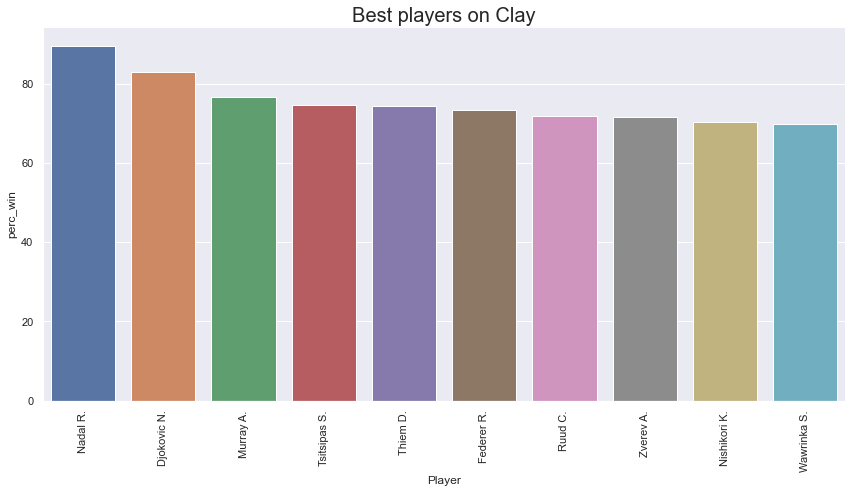

In [232]:
# Best player on Clay

top_Clay = surface[surface.Surface == 'Clay'].sort_values(by='perc_win', ascending = False).head(10)
g=sns.catplot(x='Player', y='perc_win', data=top_Clay, kind='bar', size=6, aspect=2)
t=g.set_xticklabels(labels = top_Clay.Player,  rotation=90)
title=plt.title('Best players on Clay', fontdict={'fontsize': 20})

<b>Rafael Nadal is the best player on clay.<b>

/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



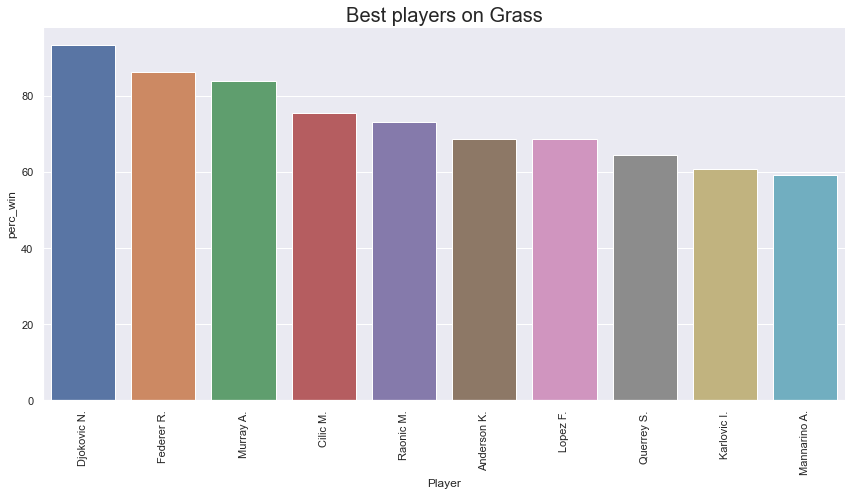

In [233]:
# Best player on Grass

top_Grass = surface[surface.Surface == 'Grass'].sort_values(by='perc_win', ascending = False).head(10)
g=sns.catplot(x='Player', y='perc_win', data=top_Grass, kind='bar', size=6, aspect=2)
t=g.set_xticklabels(labels = top_Grass.Player,  rotation=90)
title=plt.title('Best players on Grass', fontdict={'fontsize': 20})

<b>Novak Djokovic is the best player on grass.<b>

/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



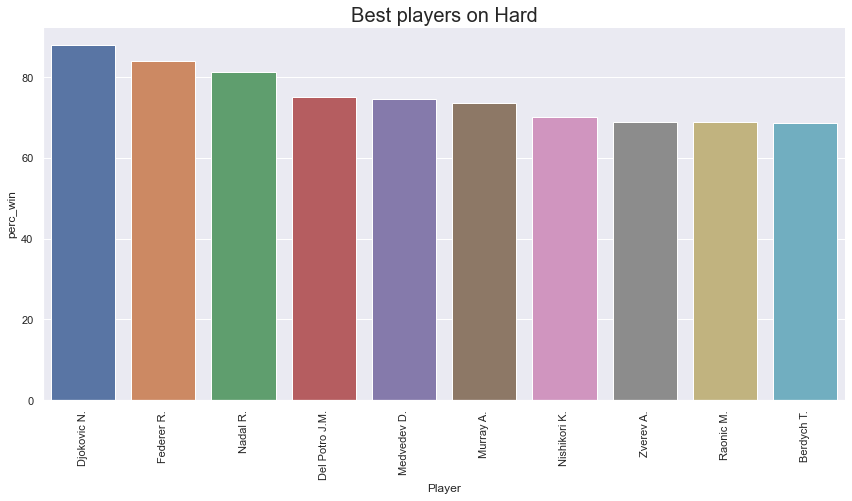

In [234]:
# Best player on Hard

top_Hard = surface[surface.Surface == 'Hard'].sort_values(by='perc_win', ascending = False).head(10)
g=sns.catplot(x='Player', y='perc_win', data=top_Hard, kind='bar', size=6, aspect=2)
g.set_xticklabels(labels = top_Hard.Player,  rotation=90)
title=plt.title('Best players on Hard', fontdict={'fontsize': 20})

<b>Novak Djokovic is also the best player on hard courts.<b>

In [235]:
# Best percentage overall

career = df_atp[['Winner', 'Loser']]

career_w = df_atp[['Winner']]
career_l = df_atp[['Loser']]
career_w.columns = ['Player']
career_l.columns = ['Player']

career_w['idx'] = range(1, len(career_w) + 1)
career_l['idx'] = range(1, len(career_l) + 1)

career_w = career_w.groupby('Player').count()
career_w = career_w.reset_index()
career_w.columns = ['Player', 'Count_Win']

career_l = career_l.groupby('Player').count()
career_l = career_l.reset_index()
career_l.columns = ['Player', 'Count_Lose']

career = pd.merge(career_w, career_l, on='Player')

career['total_play'] = career['Count_Win'] + career['Count_Lose']
career['perc_win'] = round(career['Count_Win'] / career['total_play'],4)*100

career = career[career.total_play > 100]

career = career.sort_values(by='perc_win', ascending=False).head(20)
career

/var/folders/22/477ss4vd79x9210c1mbc7hpw0000gp/T/ipykernel_85652/3405444999.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/22/477ss4vd79x9210c1mbc7hpw0000gp/T/ipykernel_85652/3405444999.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Player,Count_Win,Count_Lose,total_play,perc_win
106,Djokovic N.,493,73,566,87.10
317,Nadal R.,444,82,526,84.41
130,Federer R.,357,74,431,82.83
315,Murray A.,300,97,397,75.57
97,Del Potro J.M.,175,65,240,72.92
325,Nishikori K.,315,134,449,70.16
288,Medvedev D.,213,94,307,69.38
369,Raonic M.,281,125,406,69.21
488,Zverev A.,301,134,435,69.20
468,Wawrinka S.,278,133,411,67.64


Djokovic is the best player overall followed by Rafael Nadal and Roger Federer. These 3 players not only have the most wins, but also the highest percentage of matches won.

/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3750: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



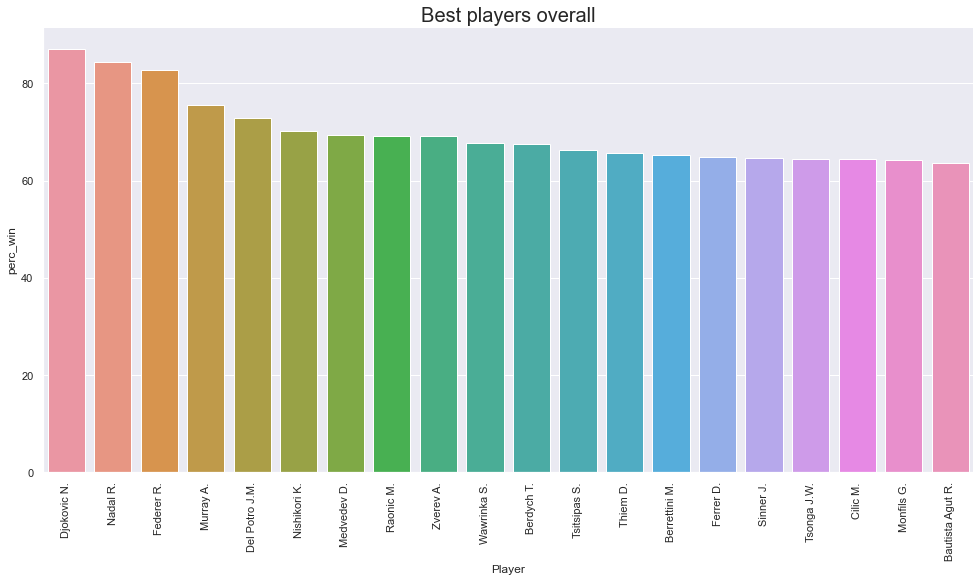

In [236]:
#Bar Graph of the best players overall by win percentage
g=sns.catplot(x='Player', y='perc_win', data=career, kind='bar', size=7, aspect=2)
g.set_xticklabels(labels = career.Player,  rotation=90)
title=plt.title('Best players overall', fontdict={'fontsize': 20})

As expected the top 3 Grand Slam tournament winners are Novak Djokavic, Rafael Nadal and Roger Federer. These 3 are also the top 3 winners of overall matches.

### For each match, what is the percentage of victories of the winner in the past?

Sorting the dataframe by date

In [237]:
df_atp['year'] = pd.DatetimeIndex(df_atp['Date']).year

In [238]:
df_atp = df_atp.sort_values(by='Date')
df_atp = df_atp.reset_index(drop=True)

In [239]:
df_atp['Percentage of wins'] = np.nan
dict_victories ={}
for index, row in df_atp.iterrows():
    if (row['Winner'] in dict_victories):
        dict_victories[row['Winner']]['Won'] += 1
        dict_victories[row['Winner']]['Played'] += 1
    else:
        dict_victories.update({row['Winner']: {'Won' :1 , 'Played' : 1 }})
    if (row['Loser'] in dict_victories):
        dict_victories[row['Loser']]['Played'] += 1
    else:
        dict_victories.update({row['Loser']: {'Won' :0 , 'Played' : 1 }})
    df_atp['Percentage of wins'][index] = (dict_victories[row['Winner']]['Won']/dict_victories[row['Winner']]['Played'])*100

/var/folders/22/477ss4vd79x9210c1mbc7hpw0000gp/T/ipykernel_85652/3408930215.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [240]:
df_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL,year,Percentage of wins
0,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Tomic B.,Zhang Z.,55.0,193.0,855.0,251.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.22,5.50,1.16,4.95,1.14,5.00,1.18,5.47,2012,100.0
1,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Kohlschreiber P.,Montanes A.,25.0,58.0,1445.0,836.0,7.0,5.0,1.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.22,5.65,1.17,4.75,1.16,5.00,1.17,5.65,2012,100.0
2,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Hewitt L.,Haas T.,59.0,12.0,825.0,2265.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.50,1.62,2.35,1.57,2.37,1.53,2.41,1.62,2012,100.0
3,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Fognini F.,Robredo T.,19.0,18.0,1840.0,1855.0,7.0,5.0,4.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,3.65,1.46,2.79,1.42,3.00,1.36,2.93,1.45,2012,100.0
4,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Querrey S.,Youzhny M.,30.0,20.0,1265.0,1780.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.75,1.62,2.49,1.51,2.37,1.53,2.70,1.52,2012,100.0


I will visualize the evolution of this percentage for the top 3 players.

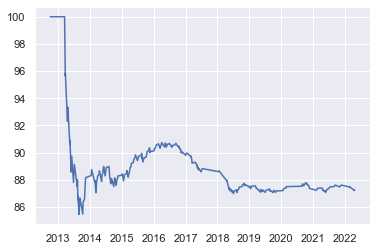

In [241]:
plt.plot(df_atp.loc[(df_atp['Winner']=='Djokovic N.')]['Date'],df_atp.loc[df_atp['Winner']=='Djokovic N.']['Percentage of wins'])


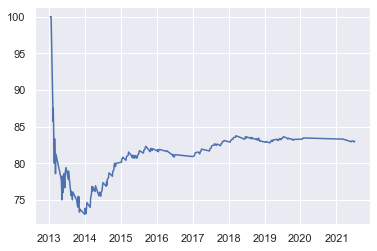

In [242]:
plt.plot(df_atp.loc[(df_atp['Winner']=='Federer R.')]['Date'],df_atp.loc[df_atp['Winner']=='Federer R.']['Percentage of wins'])

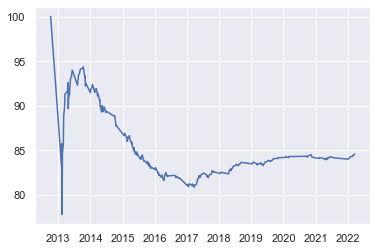

In [243]:
plt.plot(df_atp.loc[(df_atp['Winner']=='Nadal R.')]['Date'],df_atp.loc[df_atp['Winner']=='Nadal R.']['Percentage of wins'])

I will visualize the evolution of this percentage for the bottom 3 players.

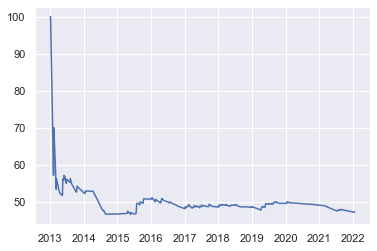

In [244]:
plt.plot(df_atp.loc[(df_atp['Winner']=='Paire B.')]['Date'],df_atp.loc[df_atp['Winner']=='Paire B.']['Percentage of wins'])

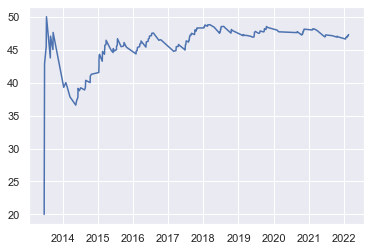

In [245]:
plt.plot(df_atp.loc[(df_atp['Winner']=='Mannarino A.')]['Date'],df_atp.loc[df_atp['Winner']=='Mannarino A.']['Percentage of wins'])

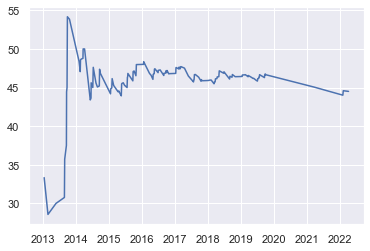

In [246]:
plt.plot(df_atp.loc[(df_atp['Winner']=='Sousa J.')]['Date'],df_atp.loc[df_atp['Winner']=='Sousa J.']['Percentage of wins'])

We can see that the percentage gets more stable when we have more data about previous matches

### Exploring Tennis competitiveness

1. How does competitiveness change between Grand Slam and Non-Grand slam tournaments? What causes the difference in competitiveness?

In [247]:
df_atp.WRank = pd.to_numeric(df_atp.WRank, errors = 'coerce') 
df_atp.LRank = pd.to_numeric(df_atp.LRank, errors = 'coerce')
# New Feature: Rank difference between the 2 oponents
df_atp['Diff'] =  df_atp.LRank - df_atp.WRank 
# New Feature: Round the rank difference to 10's and 20's
df_atp['Round_10'] = 10*round(np.true_divide(df_atp.Diff,10))
df_atp['Round_20'] = 20*round(np.true_divide(df_atp.Diff,20))
# New Feature: Total number of sets in the match
df_atp['Total Sets'] = df_atp.Wsets + df_atp.Lsets

df_atp['Sets Diff'] = df_atp.W1+df_atp.W2+df_atp.W3+df_atp.W4+df_atp.W5 - (df_atp.L1+df_atp.L2+df_atp.L3+df_atp.L4+df_atp.L5)
new_df = df_atp

# 2 New Data Frames: Grand Slam data frame (GS) and non-Grand Slam data frame (non GS)
df_non_GS = new_df[~(new_df.Series == 'Grand Slam')]
df_GS = new_df[new_df.Series == 'Grand Slam']

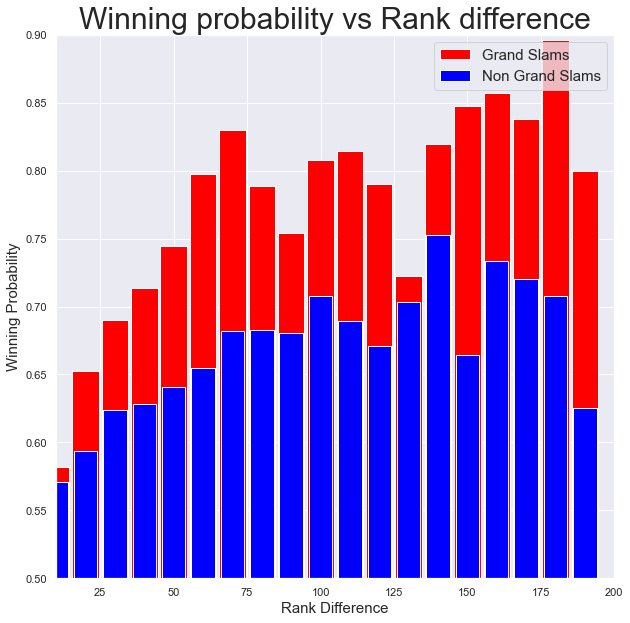

In [248]:
#%% Winning probability vs Rank Difference
plt.figure(figsize = (10,10))
bins = np.arange(10,200,10)
Gs_prob = []
non_Gs_prob = []

for value in bins:
    pos = value
    neg = -value
    
    pos_wins = len(df_GS[df_GS.Round_10 == pos])
    neg_wins = len(df_GS[df_GS.Round_10 == neg])
    Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))
    
    pos_wins = len(df_non_GS[df_non_GS.Round_10 == pos])
    neg_wins = len(df_non_GS[df_non_GS.Round_10 == neg])
    non_Gs_prob.append(np.true_divide(pos_wins,pos_wins + neg_wins))
    
    
plt.bar(bins,Gs_prob,width = 9, color = 'red') 
plt.bar(bins,non_Gs_prob,width = 8, color = 'blue')
plt.title('Winning probability vs Rank difference', fontsize = 30)
plt.xlabel('Rank Difference',fontsize = 15)
plt.ylabel('Winning Probability',fontsize = 15)
plt.xlim([10,200])
plt.ylim([0.5,0.9])
plt.legend(['Grand Slams', 'Non Grand Slams'], loc = 1, fontsize = 15)
plt.show()   


### Upsets are rare in Grand Slams

Several things can be inferred from the above graph:

1. The most obvious and trivial conclusion is of course that the chances of winning increase as the rank difference does.
2. However - this effect tends to saturate when the rank difference reaches 100 places. This saturation is noticeable in both Grand Slam and "Regular" (that is - non Grand Slam) tournaments.
3. An upset is less likely in Grand Slam tournaments as it is in regular ones. A favorite player has a ~80% chance of winning when facing an underdog ranked 100 places below in a Grand Slam tournament, but only around 70% winning chances in a regular one.

The last conclusion might be merely due to the fact that a Grand Slam match is based on the best of 5 sets method, whereas most (but not all) of the regular tournaments are best of 3. Are regular tournaments more competitive when controlling this effect? Let us look the at winning probability as a function of the rank difference for single sets:

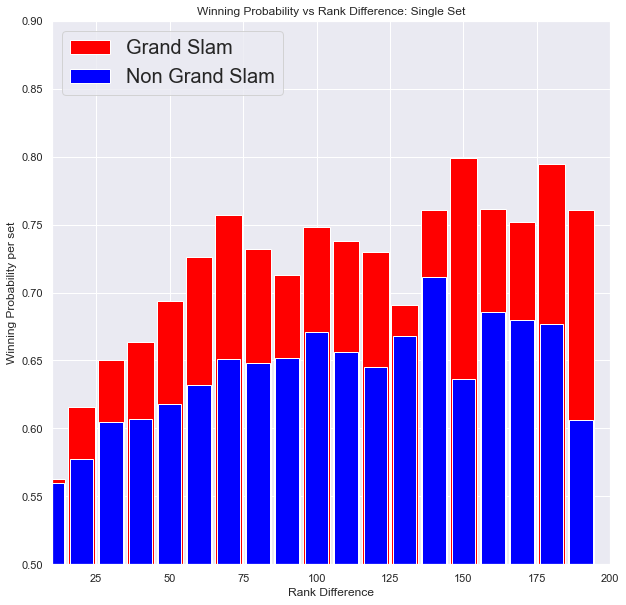

In [249]:
plt.figure(figsize = (10,10))
bins = np.arange(10,200,10)

temp_df = df_GS
prob_gs = []

for rank_diff in bins:

    pos = rank_diff
    neg = -rank_diff
    rank_diff_df_pos = temp_df[temp_df.Round_10 == pos]
    w1 = np.sum(rank_diff_df_pos.Wsets)
    l1 = np.sum(rank_diff_df_pos.Lsets)
    
    rank_diff_df_neg = temp_df[temp_df.Round_10 == neg]
    l2 = np.sum(rank_diff_df_neg.Wsets)
    w2 = np.sum(rank_diff_df_pos.Lsets)
    
    w = w1 + w2
    l = l1 + l2
    prob_gs.append(np.true_divide(w, l + w))
    
temp_df = df_non_GS
prob_non_gs = []

for rank_diff in bins:
    
    pos = rank_diff
    neg = -rank_diff
    rank_diff_df_pos = temp_df[temp_df.Round_10 == pos]
    w1 = np.sum(rank_diff_df_pos.Wsets)
    l1 = np.sum(rank_diff_df_pos.Lsets)
    
    rank_diff_df_neg = temp_df[temp_df.Round_10 == neg]
    l2 = np.sum(rank_diff_df_neg.Wsets)
    w2 = np.sum(rank_diff_df_pos.Lsets)
    
    w = w1 + w2
    l = l1 + l2
    prob_non_gs.append(np.true_divide(w, l + w))
    

#plt.hold(True)
plt.bar(bins,prob_gs,  width = 9, color = 'red',)
plt.bar(bins,prob_non_gs,  width = 8, color = 'blue')
plt.title('Winning Probability vs Rank Difference: Single Set')
plt.legend(['Grand Slam', 'Non Grand Slam'], loc = 2, fontsize = 20)
plt.xlabel('Rank Difference')
plt.ylabel('Winning Probability per set')
plt.ylim([0.5,0.9])
plt.xlim([10,200])
plt.show()

Somewhat surprisingly, even when looking on single sets only, regular tournaments tend to be more competitive than Grand Slams.

While most of the difference between Grand Slam and regular
tournaments is eliminated when only looking at single sets, upsets
are still more likely in regular tournaments, even in the set level.

It seems possible that better players focus more on Grand Slam
tournaments, as these are more prestigious. They might train more
before the tournaments, or play more seriously.

If it is about focus - would we again see a similar effect when
examining the set level? Obviously, the last set is more important
than the first one, so does this effect the chances of an upset?

Let's look at the winning probability in different sets for both kinds of tournaments:

Text(0.5, 1.0, 'Non-Grand Slam Matches')

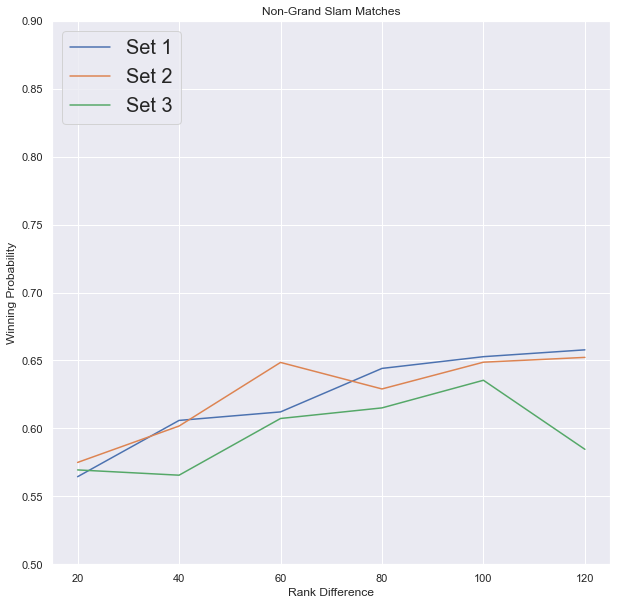

In [250]:
def Set_prob(pos_diff,set_num,df,round_factor):
       
    diff_df = df[df[round_factor] == pos_diff]
    diff_df = diff_df[diff_df['Total Sets']>=set_num]
    feat1 = "W" + str(set_num)
    feat2 = "L" + str(set_num)
    set_df = diff_df[diff_df[feat1]>diff_df[feat2]]
    w1 = len(set_df)
    l1 = len(diff_df) - w1
            
    diff_df = df[df[round_factor] == -pos_diff]
    diff_df = diff_df[diff_df['Total Sets']>=set_num]
    feat1 = "W" + str(set_num)
    feat2 = "L" + str(set_num)
    set_df = diff_df[diff_df[feat1]>diff_df[feat2]]
    l2 = len(set_df)
    w2 = len(diff_df) - l2
            
    w = w1 + w2
    l = l1 + l2
            
    return np.true_divide(w,l+w)
   
                
bins = np.arange(20,140,20)
prob_1 = []
prob_2 = []
prob_3 = []


for rank_diff in bins:
    
    prob_1.append(Set_prob(rank_diff,1,df_non_GS,"Round_20"))
    prob_2.append(Set_prob(rank_diff,2,df_non_GS,"Round_20"))
    prob_3.append(Set_prob(rank_diff,3,df_non_GS,"Round_20"))
    
plt.figure(figsize = (10,10))
plt.plot(bins,prob_1)
plt.plot(bins,prob_2)
plt.plot(bins,prob_3) 
plt.ylim([0.5,0.9])
plt.legend(['Set 1', 'Set 2', 'Set 3', 'Set 4','Set 5'], loc = 2, fontsize = 20)  
plt.xlabel('Rank Difference')
plt.ylabel('Winning Probability')
plt.title('Non-Grand Slam Matches')

### Winning probability vs Rank difference is the same for all sets in regular tournaments! What about Grand Slam tournaments?

Text(0.5, 1.0, 'Grand Slam Matches')

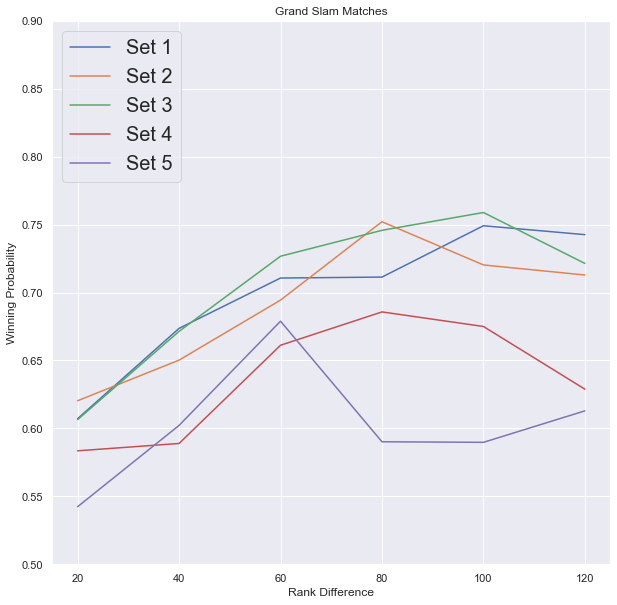

In [251]:
bins = np.arange(20,140,20)
prob_1 = []
prob_2 = []
prob_3 = []
prob_4 = []
prob_5 = []

for rank_diff in bins:
    
    prob_1.append(Set_prob(rank_diff,1,df_GS,"Round_20"))
    prob_2.append(Set_prob(rank_diff,2,df_GS,"Round_20"))
    prob_3.append(Set_prob(rank_diff,3,df_GS,"Round_20"))
    prob_4.append(Set_prob(rank_diff,4,df_GS,"Round_20"))
    prob_5.append(Set_prob(rank_diff,5,df_GS,"Round_20"))
    
plt.figure(figsize = (10,10))
plt.plot(bins,prob_1)
plt.plot(bins,prob_2)
plt.plot(bins,prob_3) 
plt.plot(bins,prob_4)
plt.plot(bins,prob_5) 
plt.ylim([0.5,0.9])
plt.legend(['Set 1', 'Set 2', 'Set 3', 'Set 4','Set 5'], loc = 2, fontsize = 20)  
plt.xlabel('Rank Difference')
plt.ylabel('Winning Probability')
plt.title('Grand Slam Matches')


<b>Winning probability for the favorite does not increase as the game moves along. if anything - it decreases<b>

### Modeling

In [252]:
from urllib.request import urlopen  
import os.path as osp
import os
import logging
import zipfile
from glob import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_squared_error 

In [253]:
#Checking the dataframe again
df_atp

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL,year,Percentage of wins,Diff,Round_10,Round_20,Total Sets,Sets Diff
0,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Tomic B.,Zhang Z.,55.0,193.0,855.0,251.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.22,5.50,1.16,4.95,1.14,5.00,1.18,5.47,2012,100.000000,138.0,140.0,140.0,2.0,3.0
1,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Kohlschreiber P.,Montanes A.,25.0,58.0,1445.0,836.0,7.0,5.0,1.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.22,5.65,1.17,4.75,1.16,5.00,1.17,5.65,2012,100.000000,33.0,30.0,40.0,3.0,-2.0
2,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Hewitt L.,Haas T.,59.0,12.0,825.0,2265.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.50,1.62,2.35,1.57,2.37,1.53,2.41,1.62,2012,100.000000,-47.0,-50.0,-40.0,2.0,4.0
3,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Fognini F.,Robredo T.,19.0,18.0,1840.0,1855.0,7.0,5.0,4.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,3.65,1.46,2.79,1.42,3.00,1.36,2.93,1.45,2012,100.000000,-1.0,-0.0,-0.0,3.0,3.0
4,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Querrey S.,Youzhny M.,30.0,20.0,1265.0,1780.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.75,1.62,2.49,1.51,2.37,1.53,2.70,1.52,2012,100.000000,-10.0,-10.0,-0.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22936,Belgrade,Serbia Open,2022-04-23,ATP250,Outdoor,Clay,Semifinals,3,Djokovic N.,Khachanov K.,1.0,26.0,8340.0,1566.0,4.0,6.0,6.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.28,4.62,1.24,4.02,1.25,4.00,1.24,4.62,2022,87.256637,25.0,20.0,20.0,3.0,7.0
22937,Barcelona,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,Semifinals,3,Alcaraz C.,De Minaur A.,11.0,25.0,3330.0,1601.0,6.0,7.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.17,6.20,1.14,5.63,1.08,8.00,1.09,9.13,2022,70.000000,14.0,10.0,20.0,3.0,2.0
22938,Barcelona,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,The Final,3,Alcaraz C.,Carreno Busta P.,11.0,19.0,3330.0,2015.0,6.0,3.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.72,2.45,1.60,2.35,1.57,2.37,1.61,2.45,2022,70.422535,8.0,10.0,0.0,2.0,7.0
22939,Barcelona,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,Semifinals,3,Carreno Busta P.,Schwartzman D.,19.0,15.0,2015.0,2715.0,6.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.19,1.76,2.12,1.74,2.10,1.72,2.32,1.69,2022,61.688312,-4.0,-0.0,-0.0,2.0,5.0


In [254]:
#Confirming there are still no null values
df_atp.isna().sum()

Location              0
Tournament            0
Date                  0
Series                0
Court                 0
Surface               0
Round                 0
Best of               0
Winner                0
Loser                 0
WRank                 0
LRank                 0
WPts                  0
LPts                  0
W1                    0
L1                    0
W2                    0
L2                    0
W3                    0
L3                    0
W4                    0
L4                    0
W5                    0
L5                    0
Wsets                 0
Lsets                 0
Comment               0
MaxW                  0
MaxL                  0
AvgW                  0
AvgL                  0
B365W                 0
B365L                 0
PSW                   0
PSL                   0
year                  0
Percentage of wins    0
Diff                  0
Round_10              0
Round_20              0
Total Sets            0
Sets Diff       

### Classification Model

So we were having 2 columns called... Winner and Loser. So I named the Winner player 1 and the Loser player 2. And for output variable (Winner_position) I have put the
- '0' if Player 1 wins
- '1' if Player 2 wins

But in this case, Player 1 will be the winner in every case. Output variable is highly baised. In order to remove the biasness, I decided to call player 1 and player 2 according to the alphabetical order of their last names and fill the output variable accordingly.

If Player 1's last name comes alphabetically before Player 2, then the `Winner_position` column gets a 0. If Player 2's last name comes alphabetically before Player 1, then the `Winner_position` column gets a 1.

In [255]:
df_atp["Winner_position"] = df_atp.apply(lambda row: 1 if row["Winner"] > row["Loser"] else 0, axis=1)
df_atp[["Winner", "Loser", "Winner_position"]].head(50)

,Winner,Loser,Winner_position
0,Tomic B.,Zhang Z.,0
1,Kohlschreiber P.,Montanes A.,0
2,Hewitt L.,Haas T.,1
3,Fognini F.,Robredo T.,0
4,Querrey S.,Youzhny M.,0
5,Gasquet R.,Mayer F.,0
6,Bautista R.,Dimitrov G.,0
7,Dolgopolov O.,Brands D.,1
8,Tsonga J.W.,Monfils G.,1
9,Nieminen J.,Monaco J.,1


Checking to see how many values there are for each variable in the `Winner_position` column

In [256]:
print(df_atp[df_atp["Winner_position"] == 0].shape[0])
print(df_atp[df_atp["Winner_position"] == 1].shape[0])

11509
11432


Confirming `Winner_position` is 50/50

In [257]:
df_atp['Winner_position'].value_counts()/df_atp['Winner_position'].shape[0]*100.0

0    50.167822
1    49.832178
Name: Winner_position, dtype: float64

In [258]:
#Checking to see Winner_position is in the dataframe
df_atp

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL,year,Percentage of wins,Diff,Round_10,Round_20,Total Sets,Sets Diff,Winner_position
0,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Tomic B.,Zhang Z.,55.0,193.0,855.0,251.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.22,5.50,1.16,4.95,1.14,5.00,1.18,5.47,2012,100.000000,138.0,140.0,140.0,2.0,3.0,0
1,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Kohlschreiber P.,Montanes A.,25.0,58.0,1445.0,836.0,7.0,5.0,1.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.22,5.65,1.17,4.75,1.16,5.00,1.17,5.65,2012,100.000000,33.0,30.0,40.0,3.0,-2.0,0
2,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Hewitt L.,Haas T.,59.0,12.0,825.0,2265.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.50,1.62,2.35,1.57,2.37,1.53,2.41,1.62,2012,100.000000,-47.0,-50.0,-40.0,2.0,4.0,1
3,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Fognini F.,Robredo T.,19.0,18.0,1840.0,1855.0,7.0,5.0,4.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,3.65,1.46,2.79,1.42,3.00,1.36,2.93,1.45,2012,100.000000,-1.0,-0.0,-0.0,3.0,3.0,0
4,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Querrey S.,Youzhny M.,30.0,20.0,1265.0,1780.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.75,1.62,2.49,1.51,2.37,1.53,2.70,1.52,2012,100.000000,-10.0,-10.0,-0.0,2.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22936,Belgrade,Serbia Open,2022-04-23,ATP250,Outdoor,Clay,Semifinals,3,Djokovic N.,Khachanov K.,1.0,26.0,8340.0,1566.0,4.0,6.0,6.0,1.0,6.0,2.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.28,4.62,1.24,4.02,1.25,4.00,1.24,4.62,2022,87.256637,25.0,20.0,20.0,3.0,7.0,0
22937,Barcelona,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,Semifinals,3,Alcaraz C.,De Minaur A.,11.0,25.0,3330.0,1601.0,6.0,7.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.17,6.20,1.14,5.63,1.08,8.00,1.09,9.13,2022,70.000000,14.0,10.0,20.0,3.0,2.0,0
22938,Barcelona,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,The Final,3,Alcaraz C.,Carreno Busta P.,11.0,19.0,3330.0,2015.0,6.0,3.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.72,2.45,1.60,2.35,1.57,2.37,1.61,2.45,2022,70.422535,8.0,10.0,0.0,2.0,7.0,0
22939,Barcelona,Barcelona Open,2022-04-24,ATP500,Outdoor,Clay,Semifinals,3,Carreno Busta P.,Schwartzman D.,19.0,15.0,2015.0,2715.0,6.0,3.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.19,1.76,2.12,1.74,2.10,1.72,2.32,1.69,2022,61.688312,-4.0,-0.0,-0.0,2.0,5.0,0


### Feature Engineering and Data preprocessing

Dropping features which are irrelevant for prediction model. I didn't want any features that provided information about the result of the match, just information that is known before the match is played. So features such as (W1, W2, W3,W4, W5, L1, L2, L3, L4, L5, Wsets, Lsets, Round, Comments, etc..) are not required. Also, features like Location and Tournament describes the same information. Hence I only selected Tournament among them.

In [259]:
df_atp_X = df_atp.loc[:, ['AvgW', 'AvgL', 'B365W', 'MaxW', 'MaxL', 'B365L', 'PSW', 'PSL', \
                          'Date', 'Best of', 'WRank', 'LRank', 'Tournament', \
                          'Series', 'Court', 'Surface', 'Winner_position']]

In [260]:
df_atp_X

,AvgW,AvgL,B365W,MaxW,MaxL,B365L,PSW,PSL,Date,Best of,WRank,LRank,Tournament,Series,Court,Surface,Winner_position
0,1.16,4.95,1.14,1.22,5.50,5.00,1.18,5.47,2012-10-01,3,55.0,193.0,China Open,ATP500,Outdoor,Hard,0
1,1.17,4.75,1.16,1.22,5.65,5.00,1.17,5.65,2012-10-01,3,25.0,58.0,China Open,ATP500,Outdoor,Hard,0
2,2.35,1.57,2.37,2.50,1.62,1.53,2.41,1.62,2012-10-01,3,59.0,12.0,China Open,ATP500,Outdoor,Hard,1
3,2.79,1.42,3.00,3.65,1.46,1.36,2.93,1.45,2012-10-01,3,19.0,18.0,China Open,ATP500,Outdoor,Hard,0
4,2.49,1.51,2.37,2.75,1.62,1.53,2.70,1.52,2012-10-01,3,30.0,20.0,China Open,ATP500,Outdoor,Hard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22936,1.24,4.02,1.25,1.28,4.62,4.00,1.24,4.62,2022-04-23,3,1.0,26.0,Serbia Open,ATP250,Outdoor,Clay,0
22937,1.14,5.63,1.08,1.17,6.20,8.00,1.09,9.13,2022-04-24,3,11.0,25.0,Barcelona Open,ATP500,Outdoor,Clay,0
22938,1.60,2.35,1.57,1.72,2.45,2.37,1.61,2.45,2022-04-24,3,11.0,19.0,Barcelona Open,ATP500,Outdoor,Clay,0
22939,2.12,1.74,2.10,2.19,1.76,1.72,2.32,1.69,2022-04-24,3,19.0,15.0,Barcelona Open,ATP500,Outdoor,Clay,0


### Data Preprocessing
-  Converting categorical columns into numerical
- Rearranging player specific data like Rank, Points, Betting odds as per new Output label (Winner_position '0' or '1')

In [261]:
df_atp_X.iloc[:, :-4] = df_atp_X.apply(pd.to_numeric, errors='coerce') 

In [262]:
df_atp_X

,AvgW,AvgL,B365W,MaxW,MaxL,B365L,PSW,PSL,Date,Best of,WRank,LRank,Tournament,Series,Court,Surface,Winner_position
0,1.16,4.95,1.14,1.22,5.50,5.00,1.18,5.47,1349049600000000000,3,55.0,193.0,NaN,ATP500,Outdoor,Hard,0
1,1.17,4.75,1.16,1.22,5.65,5.00,1.17,5.65,1349049600000000000,3,25.0,58.0,NaN,ATP500,Outdoor,Hard,0
2,2.35,1.57,2.37,2.50,1.62,1.53,2.41,1.62,1349049600000000000,3,59.0,12.0,NaN,ATP500,Outdoor,Hard,1
3,2.79,1.42,3.00,3.65,1.46,1.36,2.93,1.45,1349049600000000000,3,19.0,18.0,NaN,ATP500,Outdoor,Hard,0
4,2.49,1.51,2.37,2.75,1.62,1.53,2.70,1.52,1349049600000000000,3,30.0,20.0,NaN,ATP500,Outdoor,Hard,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22936,1.24,4.02,1.25,1.28,4.62,4.00,1.24,4.62,1650672000000000000,3,1.0,26.0,NaN,ATP250,Outdoor,Clay,0
22937,1.14,5.63,1.08,1.17,6.20,8.00,1.09,9.13,1650758400000000000,3,11.0,25.0,NaN,ATP500,Outdoor,Clay,0
22938,1.60,2.35,1.57,1.72,2.45,2.37,1.61,2.45,1650758400000000000,3,11.0,19.0,NaN,ATP500,Outdoor,Clay,0
22939,2.12,1.74,2.10,2.19,1.76,1.72,2.32,1.69,1650758400000000000,3,19.0,15.0,NaN,ATP500,Outdoor,Clay,0


<b>Assigning Rank, Points, Betting odds as per Winner_position of Player.<b>

In [263]:
df_atp_X["P1Rank"] = df_atp_X.apply(lambda row: row["WRank"] if row["Winner_position"] == 1 else row["LRank"], axis=1)
df_atp_X["P0Rank"] = df_atp_X.apply(lambda row: row["WRank"] if row["Winner_position"] == 0 else row["LRank"], axis=1)
df_atp_X=df_atp_X.drop("WRank", axis=1)
df_atp_X=df_atp_X.drop("LRank", axis=1)
for cols in ( ('AvgL', 'AvgW'), ('B365L', 'B365W'), ('MaxL', 'MaxW'), ('PSL', 'PSW')):
    suffix=cols[1][:-1]
    df_atp_X["P1"+suffix] = df_atp_X.apply(lambda row: row[cols[1]] if row["Winner_position"] == 1 else row[cols[0]], axis=1)
    df_atp_X["P0"+suffix] = df_atp_X.apply(lambda row: row[cols[1]] if row["Winner_position"] == 0 else row[cols[0]], axis=1)
    df_atp_X=df_atp_X.drop(cols[0], axis=1)
    df_atp_X=df_atp_X.drop(cols[1], axis=1) 

<b>Encoding for categorical values<b>

In [264]:
column_names_for_onehot = df_atp_X.columns[2:6]
encoded_atp_df = pd.get_dummies(df_atp_X, columns=column_names_for_onehot, drop_first=True)

<b>Confirming the columns that are converted to dummy columns<b>

In [265]:
column_names_for_onehot

Index(['Tournament', 'Series', 'Court', 'Surface'], dtype='object')

<b>Date Feature engineering<b>

In [266]:
encoded_atp_df['Date'] = pd.to_datetime(encoded_atp_df['Date'], format = '%Y-%m-%dT', errors = 'coerce')
encoded_atp_df['Date_year'] = encoded_atp_df['Date'].dt.year
encoded_atp_df['Date_month'] = encoded_atp_df['Date'].dt.month
encoded_atp_df['Date_week'] = encoded_atp_df['Date'].dt.week
encoded_atp_df['Date_day'] = encoded_atp_df['Date'].dt.day
encoded_atp_df=encoded_atp_df.drop("Date", axis=1)

/var/folders/22/477ss4vd79x9210c1mbc7hpw0000gp/T/ipykernel_85652/3963516321.py:4: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



<b>Correlation Matrix: To check features with high corelation with each other<b>

/var/folders/22/477ss4vd79x9210c1mbc7hpw0000gp/T/ipykernel_85652/148784944.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



Features to be dropped:  ['P1B365', 'P0B365', 'P1Max', 'P1PS', 'P0PS', 'Series_Grand Slam', 'Date_week']


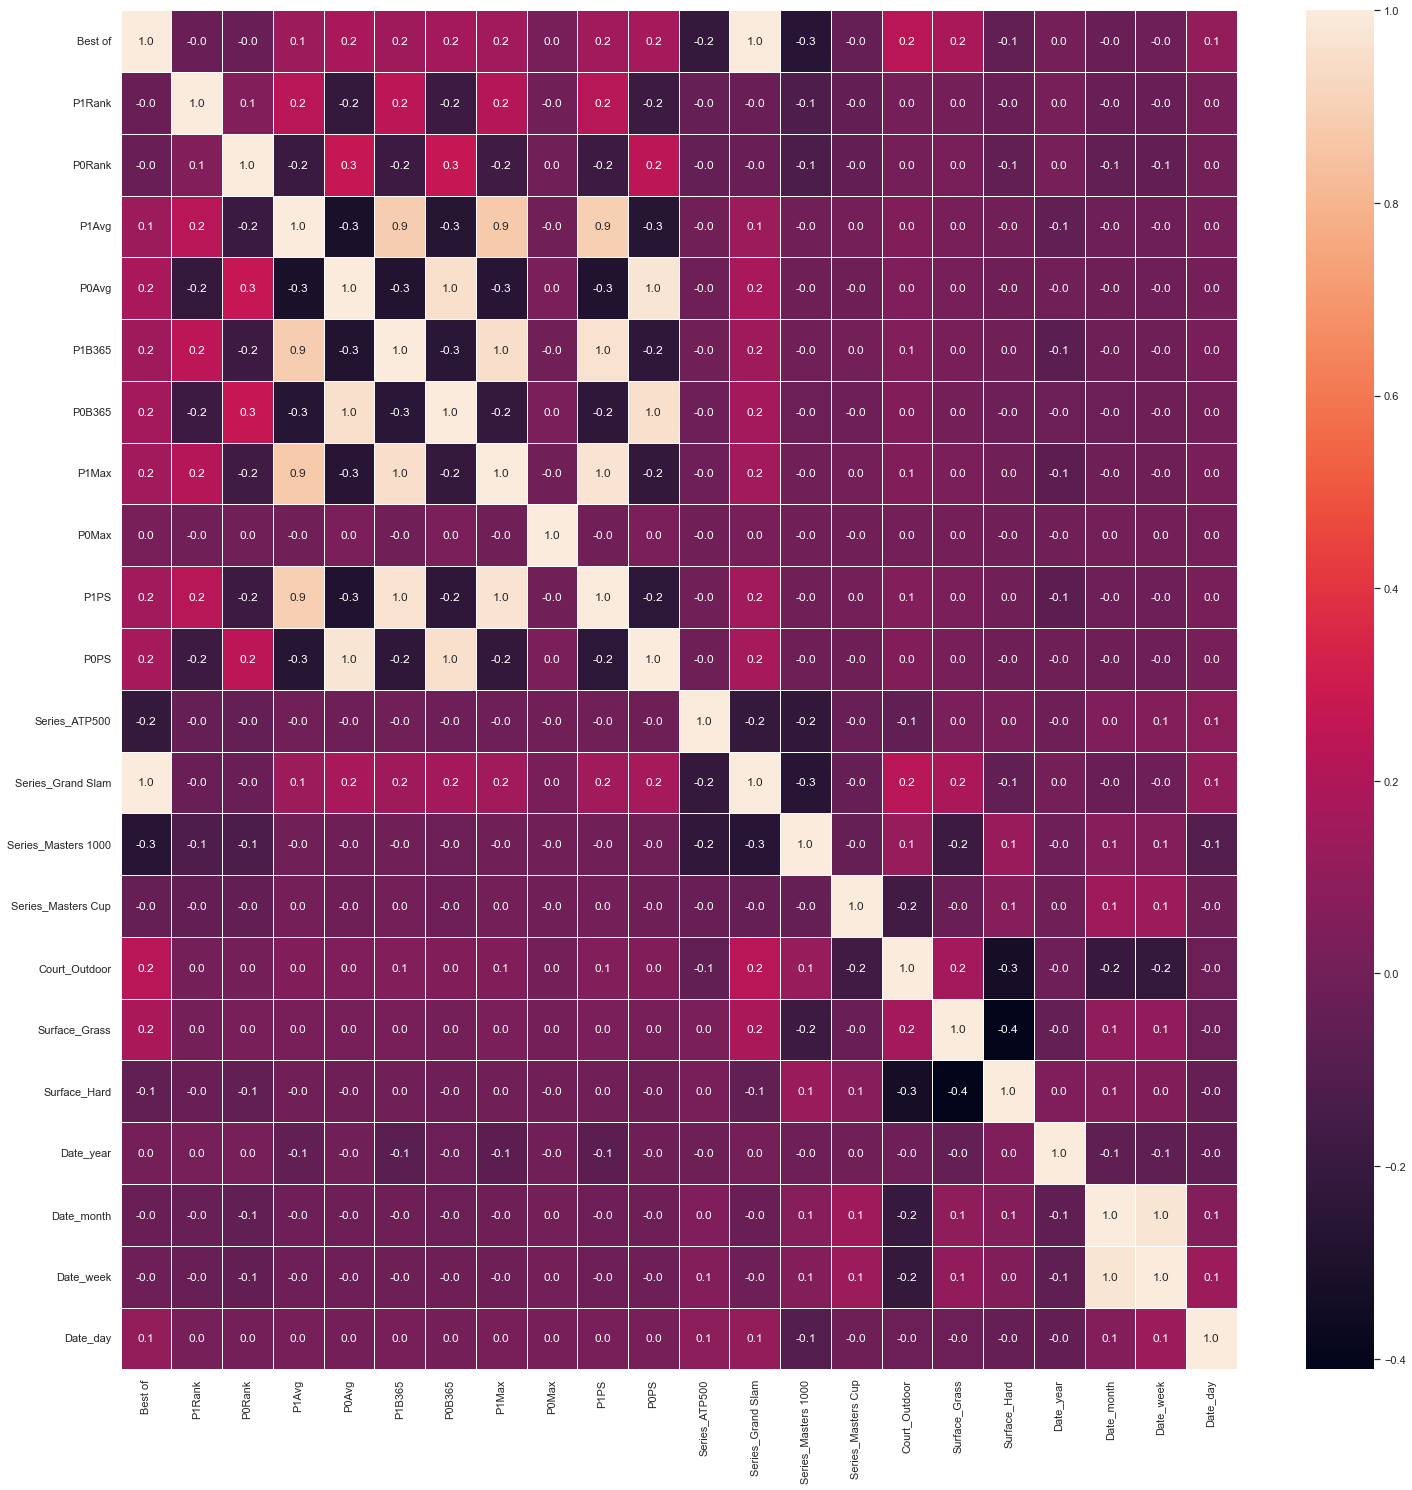

In [267]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(encoded_atp_df.drop("Winner_position", axis=1).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

corr_matrix = encoded_atp_df.drop("Winner_position", axis=1).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
print("Features to be dropped: ",to_drop)
# Drop features 
encoded_atp_df.drop(to_drop, axis=1, inplace=True)
# encoded_atp_df.head()

In [268]:
df_atp.head()

,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,Loser,WRank,LRank,WPts,LPts,W1,L1,W2,L2,W3,L3,W4,L4,W5,L5,Wsets,Lsets,Comment,MaxW,MaxL,AvgW,AvgL,B365W,B365L,PSW,PSL,year,Percentage of wins,Diff,Round_10,Round_20,Total Sets,Sets Diff,Winner_position
0,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Tomic B.,Zhang Z.,55.0,193.0,855.0,251.0,7.0,6.0,6.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,1.22,5.50,1.16,4.95,1.14,5.00,1.18,5.47,2012,100.0,138.0,140.0,140.0,2.0,3.0,0
1,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Kohlschreiber P.,Montanes A.,25.0,58.0,1445.0,836.0,7.0,5.0,1.0,6.0,7.0,6.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,1.22,5.65,1.17,4.75,1.16,5.00,1.17,5.65,2012,100.0,33.0,30.0,40.0,3.0,-2.0,0
2,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Hewitt L.,Haas T.,59.0,12.0,825.0,2265.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.50,1.62,2.35,1.57,2.37,1.53,2.41,1.62,2012,100.0,-47.0,-50.0,-40.0,2.0,4.0,1
3,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Fognini F.,Robredo T.,19.0,18.0,1840.0,1855.0,7.0,5.0,4.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,2.0,1.0,Completed,3.65,1.46,2.79,1.42,3.00,1.36,2.93,1.45,2012,100.0,-1.0,-0.0,-0.0,3.0,3.0,0
4,Beijing,China Open,2012-10-01,ATP500,Outdoor,Hard,1st Round,3,Querrey S.,Youzhny M.,30.0,20.0,1265.0,1780.0,7.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,Completed,2.75,1.62,2.49,1.51,2.37,1.53,2.70,1.52,2012,100.0,-10.0,-10.0,-0.0,2.0,4.0,0


<b>Plotting the Columns<b>

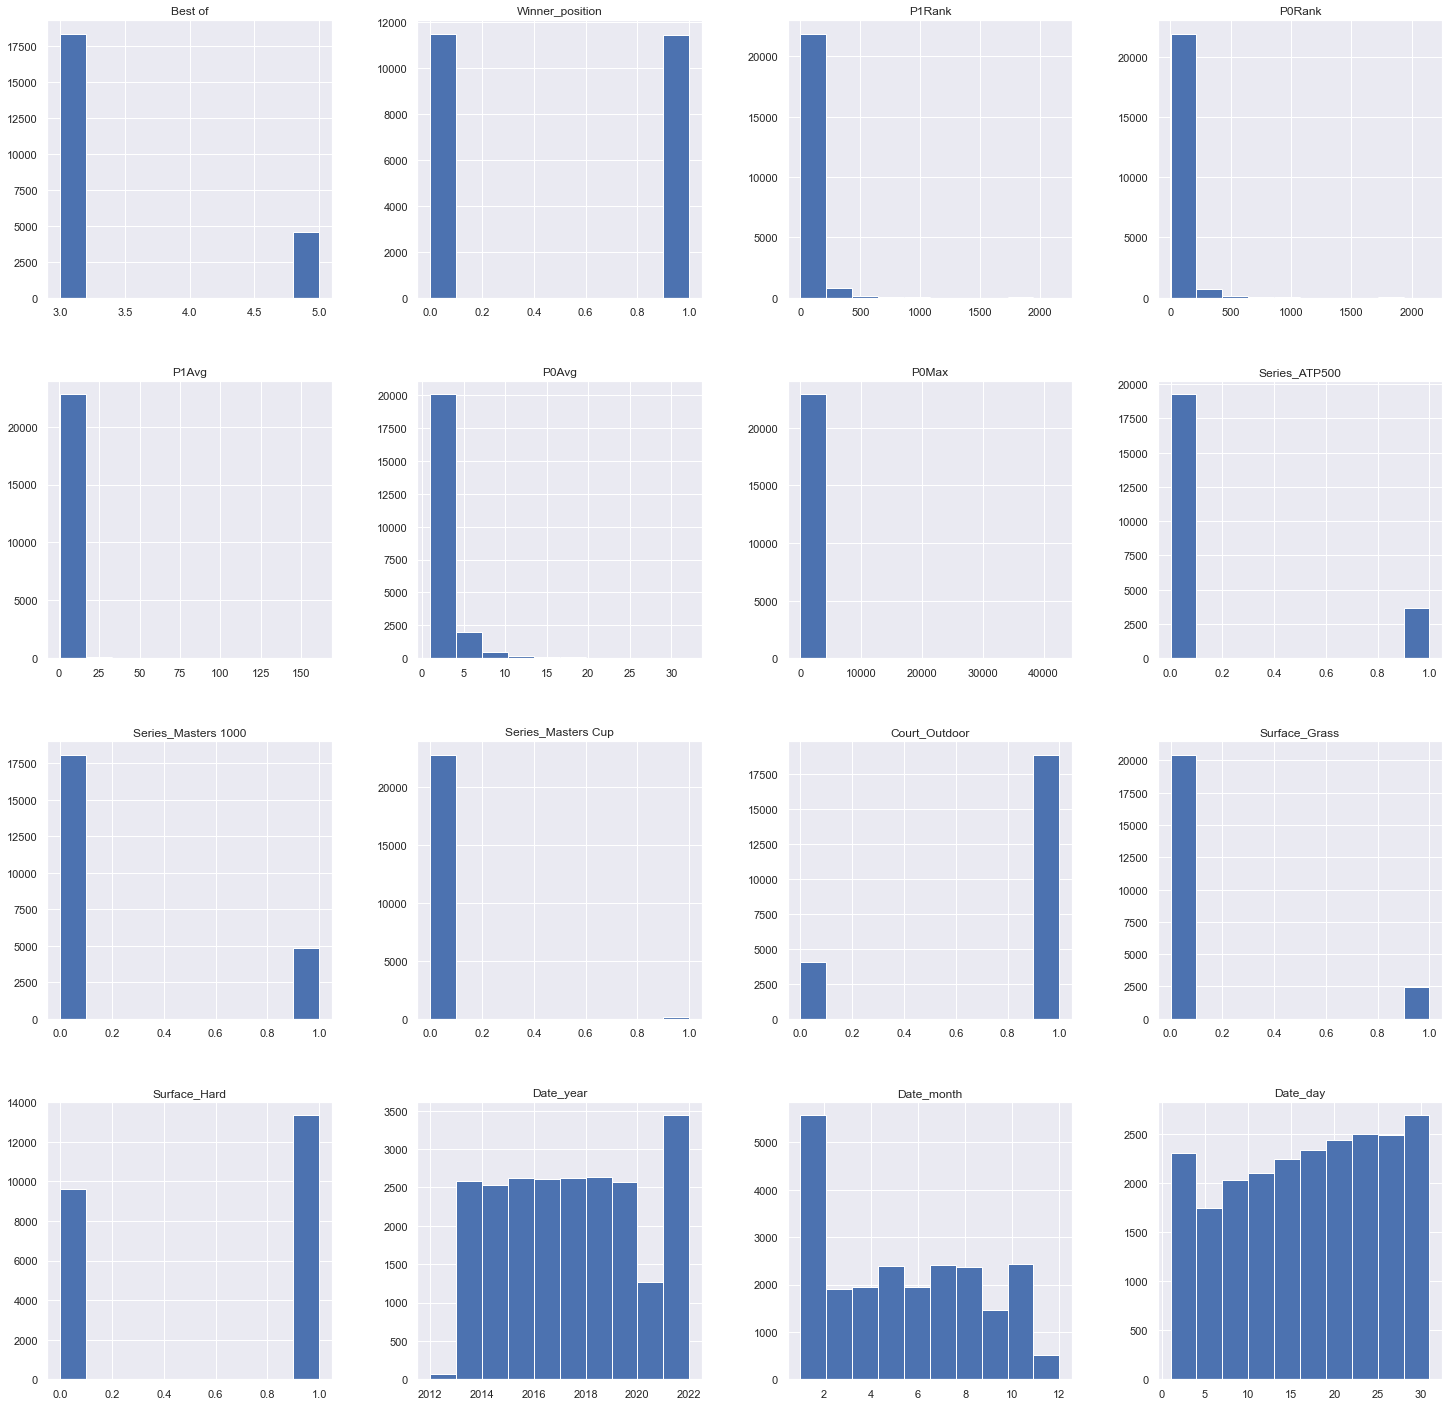

In [269]:
from pandas.plotting import scatter_matrix
encoded_atp_df.hist()
plt.gcf().set_size_inches(25, 25)
sns.set(color_codes=True)
encoded_atp_df = encoded_atp_df.loc[:,encoded_atp_df.apply(pd.Series.nunique) != 1]

#### Splitting the data

To split the data, I decided to focus on splitting them based on the year. This is a time series data, so I want to make all the data in the test set after all the data in the train set. We can't train an algorithm on data in the future and use it to predict data in the past. We can only predict the future by using data from the past. 

The test set is supposed to have less data than the train set, so it has more data to learn from. I decided to split the data about 80/20, so I made the test set have data from the years 2020 till 2022 and the train data comes before 2020.


In [270]:
year_to_predict = 2020

df_train = encoded_atp_df.iloc[df_atp[df_atp["Date"].dt.year < year_to_predict].index]
df_test = encoded_atp_df.iloc[df_atp[df_atp["Date"].dt.year >= year_to_predict].index]

X_train = df_train.drop(["Winner_position"], axis=1)
y_train = df_train["Winner_position"]

X_test = df_test.drop(["Winner_position"], axis=1)
y_test = df_test["Winner_position"]

print("Training Set Shape: ",X_train.shape,  y_train.shape)
print("Test Set Shape:     ",X_test.shape,  y_test.shape)

Training Set Shape:  (18238, 15) (18238,)
Test Set Shape:      (4703, 15) (4703,)


<b>Feature Scaling using StandardScaler<b>

In [271]:
sc = StandardScaler()  
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

#### Hyper parameter tuning for Random Forest

In [272]:
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 5, stop = 40, num = 5)]
#number of features at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(4, 32, num = 6)]
max_depth.append(None)
criterion=['entropy','gini']
# Method of selecting samples for training each tree
bootstrap = [True,False]
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth,
 'criterion': criterion,
 'bootstrap': bootstrap  
 }

In [273]:
#Random search of parameters
rfc_random = RandomizedSearchCV(RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2,
                                random_state=42, n_jobs = -1)

In [274]:
# Fit the model
rfc_random.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [4, 9, 15, 20, 26, 32,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [5, 13, 22, 31, 40]},
                   random_state=42, verbose=2)

In [275]:
# print results
print("Best Parameters for Random Forest: ",rfc_random.best_params_)

Best Parameters for Random Forest:  {'n_estimators': 31, 'max_features': 'auto', 'max_depth': 4, 'criterion': 'gini', 'bootstrap': False}


<b>Multiple Classification Model for prediction<b>

In [276]:
names_of_classifier = ["Random Forest","Decision Tree","Linear SVM","K-Nearest Neighbors",  "SVM-RBF", "AdaBoost"]

classifier = [
    RandomForestClassifier(n_estimators= 31, criterion="gini", bootstrap = False, max_depth=4, max_features = 'auto',class_weight="balanced"),
    DecisionTreeClassifier(max_depth=9),
    SVC(kernel="linear", C=0.03),
    KNeighborsClassifier(6, n_jobs=-1),
    SVC(gamma=3, C=1),
    AdaBoostClassifier()]

Classifier:  Random Forest

Accuracy for Test Set:  0.6748883691260897
Mean Squared Error for Test Set:  0.325
Confusion matrix for Test Set 
 [[1377  957]
 [ 572 1797]]
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      2334
           1       0.65      0.76      0.70      2369

    accuracy                           0.67      4703
   macro avg       0.68      0.67      0.67      4703
weighted avg       0.68      0.67      0.67      4703

ROC Curve for for Test Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



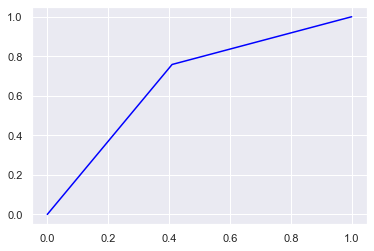

Classifier:  Decision Tree

Accuracy for Test Set:  0.658303210716564
Mean Squared Error for Test Set:  0.342
Confusion matrix for Test Set 
 [[1382  952]
 [ 655 1714]]
              precision    recall  f1-score   support

           0       0.68      0.59      0.63      2334
           1       0.64      0.72      0.68      2369

    accuracy                           0.66      4703
   macro avg       0.66      0.66      0.66      4703
weighted avg       0.66      0.66      0.66      4703

ROC Curve for for Test Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



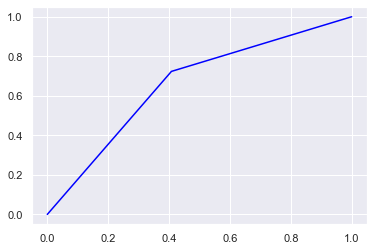

Classifier:  Linear SVM

Accuracy for Test Set:  0.6880714437593026
Mean Squared Error for Test Set:  0.312
Confusion matrix for Test Set 
 [[1761  573]
 [ 894 1475]]
              precision    recall  f1-score   support

           0       0.66      0.75      0.71      2334
           1       0.72      0.62      0.67      2369

    accuracy                           0.69      4703
   macro avg       0.69      0.69      0.69      4703
weighted avg       0.69      0.69      0.69      4703

ROC Curve for for Test Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



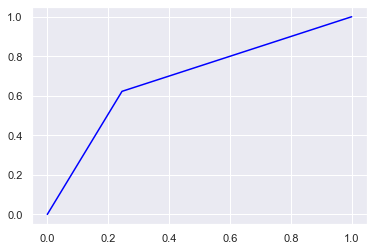

Classifier:  K-Nearest Neighbors

Accuracy for Test Set:  0.6255581543695513
Mean Squared Error for Test Set:  0.374
Confusion matrix for Test Set 
 [[1641  693]
 [1068 1301]]
              precision    recall  f1-score   support

           0       0.61      0.70      0.65      2334
           1       0.65      0.55      0.60      2369

    accuracy                           0.63      4703
   macro avg       0.63      0.63      0.62      4703
weighted avg       0.63      0.63      0.62      4703

ROC Curve for for Test Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



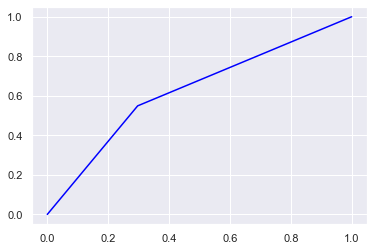

Classifier:  SVM-RBF

Accuracy for Test Set:  0.5298745481607484
Mean Squared Error for Test Set:  0.47
Confusion matrix for Test Set 
 [[2030  304]
 [1907  462]]
              precision    recall  f1-score   support

           0       0.52      0.87      0.65      2334
           1       0.60      0.20      0.29      2369

    accuracy                           0.53      4703
   macro avg       0.56      0.53      0.47      4703
weighted avg       0.56      0.53      0.47      4703

ROC Curve for for Test Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



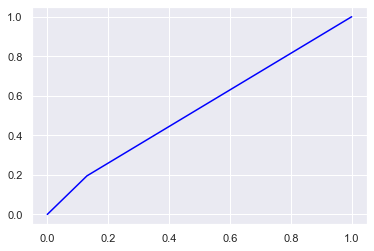

Classifier:  AdaBoost

Accuracy for Test Set:  0.6770146714862854
Mean Squared Error for Test Set:  0.323
Confusion matrix for Test Set 
 [[1388  946]
 [ 573 1796]]
              precision    recall  f1-score   support

           0       0.71      0.59      0.65      2334
           1       0.65      0.76      0.70      2369

    accuracy                           0.68      4703
   macro avg       0.68      0.68      0.67      4703
weighted avg       0.68      0.68      0.67      4703

ROC Curve for for Test Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



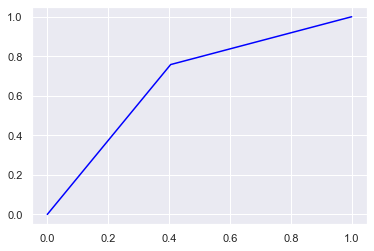

--------------------------------------xxx--------------------------------------




In [277]:
for name, classifier in zip(names_of_classifier, classifier):
    classifier.fit(X_train_scaled,y_train)
    
    y_predict=classifier.predict(X_test_scaled)
    y_Train_predict=classifier.predict(X_train_scaled)
    print("Classifier: ",name)
    print("\nAccuracy for Test Set: ",accuracy_score(y_test, y_predict))
    print( "Mean Squared Error for Test Set: ",round(mean_squared_error(y_test,y_predict), 3))
    print("Confusion matrix for Test Set \n",confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    fpr, tpr, thresholds= metrics.roc_curve(y_test,y_predict)
    auc = metrics.roc_auc_score(y_test,y_predict, average='macro', sample_weight=None)
    print("ROC Curve for for Test Set \n")
    sns.set_style('darkgrid')
    sns.lineplot(fpr,tpr,color ='blue')
    plt.show()
    
print("--------------------------------------xxx--------------------------------------\n\n")    


Accuracy for Train Set:  0.6947581971707424
Mean Squared Error for Train Set:  0.305
Confusion matrix for Train Set 
 [[5674 3501]
 [2066 6997]]
              precision    recall  f1-score   support

           0       0.73      0.62      0.67      9175
           1       0.67      0.77      0.72      9063

    accuracy                           0.69     18238
   macro avg       0.70      0.70      0.69     18238
weighted avg       0.70      0.69      0.69     18238

ROC Curve for for Train Set 



/Users/allanisla/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



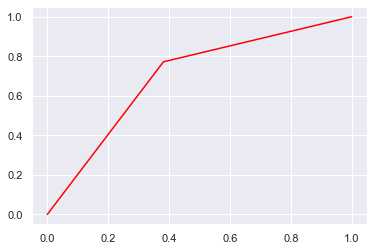

--------------------------------------xxx--------------------------------------


[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=20, max_features=auto, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=26, max_features=sqrt, n_estimators=40; total time=   1.0s
[CV] END bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, criterion=entropy, max_depth=9, max_features=sqrt, n_estimators=5; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=13; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=22; total time=   0.3s
[CV] END bootstrap=False, crite

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=31; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=40; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=40; total time=   0.3s
[CV] END bootstrap=False, criterion=gini, max_depth=9, max_features=auto, n_estimators=13; total time=   0.2s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, n_estimators=22; total time=   0.3s
[CV] END bootstrap=True, criterion=entropy, max_depth=26, max_features=auto, n_estimators=22; total time=   0.4s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=13; total time=   0.3s
[CV] END bootstrap=False, criterion=entropy, max_depth=4, max_features=auto, n_estimators=22; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=32, max_features=auto, n_estimators=22; total time=

[CV] END bootstrap=True, criterion=gini, max_depth=20, max_features=sqrt, n_estimators=31; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=9, max_features=auto, n_estimators=40; total time=   0.6s
[CV] END bootstrap=False, criterion=entropy, max_depth=None, max_features=auto, n_estimators=31; total time=   0.9s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=False, criterion=gini, max_depth=4, max_features=auto, n_estimators=5; total time=   0.0s
[CV] END bootstrap=True, criterion=entropy, max_depth=None, max_features=sqrt, n_estimators=13; total time=   0.3s
[CV] END bootstrap=True, criterion=gini, max_depth=15, max_features=auto, n_estimators=5; total time=   0.1s
[CV] END bootstrap=True, criterion=gini, max_depth=26, max_features=sqrt, n_estimators=40; total time=   0.6s
[CV] END bootstrap=False, criterion=gini, max_depth=32, max_features=sqrt, n_estimators=31; total time=   0.7

In [278]:
print("\nAccuracy for Train Set: ",accuracy_score(y_train, y_Train_predict))
print( "Mean Squared Error for Train Set: ",round(mean_squared_error(y_train,y_Train_predict), 3))
print("Confusion matrix for Train Set \n",confusion_matrix(y_train,y_Train_predict))
print(classification_report(y_train,y_Train_predict))
fpr_train, tpr_train, thresholds_train= metrics.roc_curve(y_train,y_Train_predict)
auc_train = metrics.roc_auc_score(y_train,y_Train_predict, average='macro', sample_weight=None)
print("ROC Curve for for Train Set \n")
sns.set_style('darkgrid')
sns.lineplot(fpr_train,tpr_train,color ='red')
plt.show()

print("--------------------------------------xxx--------------------------------------\n\n")

### Conclusion 

When it comes to modeling, the results overall were very similar all around, which shows consistency. The models averaged around 60-70% in accuracy. 

Ideally, I want my models to be above 70%. Perhaps I need more data, I could include more than 10 years. Also, there were some columns that had 50% filled with null values. I might need to do more Feature Engineering or fine tune the hyperparameters of more of the models in order to improve the quality of prediction.
